torch.Size([2000])
torch.Size([2000, 3])
Parameter containing:
tensor([[ 0.8472, -0.0012, -0.0920]], requires_grad=True)
Result: y = 0.0071390955708920956 + 0.8472449779510498 x + -0.0012316127540543675 x^2 + -0.09197968244552612 x^3


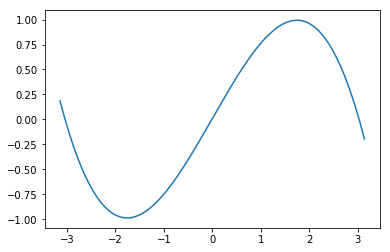

In [20]:
# 使用 nn.Sequential 模型拟合 sin 函数
# nn

import torch
import math
from matplotlib import pyplot as plt


x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# torch.Size([2000])
print(x.shape)

p = torch.tensor([1, 2, 3])
# 整理数据， 使其能够输入神经网络模型
xx = x.unsqueeze(-1).pow(p)

# torch.Size([2000, 3])
print(xx.shape)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1), # 输出 torch.Size([2000, 1])
    torch.nn.Flatten(0, 1) # 输出 torch.Size([2000])
)

# reduction = 'mean' 平方和处以样本数， sum 只算平方和
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    y_pred = model(xx)


    loss = loss_fn(y_pred, y)
    # if t % 100 == 99:
        # print(t, loss.item())

    model.zero_grad()


    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

linear_layer = model[0]

print(linear_layer.weight)


plt.plot(x, linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x + linear_layer.weight[:, 1].item() * x**2 + linear_layer.weight[:, 2].item() * x**3)

print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')
